<a href="https://colab.research.google.com/github/Shakil-1501/TSAI/blob/master/S8/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
#from model1 import *

In [0]:
from google.colab import files
files.upload()

Saving resnetmodel.py to resnetmodel.py


{'resnetmodel.py': b'# -*- coding: utf-8 -*-\n"""Resnetmodel.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1P34CLzYDzawkHCQdQ6egfZyA5-gpSQ7c\n"""\n\nimport torch\nimport torchvision\nimport torchvision.transforms as transforms\n\nimport torch.nn as nn\nimport torch.nn.functional as F\nclass BasicBlock(nn.Module):\n    expansion = 1\n\n    def __init__(self, in_planes, planes, stride=1):\n        super(BasicBlock, self).__init__()\n        self.conv1 = nn.Conv2d(\n            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)\n        self.bn1 = nn.BatchNorm2d(planes)\n        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,\n                               stride=1, padding=1, bias=False)\n        self.bn2 = nn.BatchNorm2d(planes)\n\n        self.shortcut = nn.Sequential()\n        if stride != 1 or in_planes != self.expansion*planes:\n            self.shortcut = nn.Sequential(\n   

In [0]:
from resnetmodel import *

cuda


In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_transform = transforms.Compose( [transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.RandomCrop(32, padding=2),
                                       #transforms.RandomErasing(),
                                       transforms.ColorJitter(brightness=0.1, contrast=0.1,saturation=0.1,hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=30,
                                          shuffle=True,num_workers=4, pin_memory=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=30,
                                         shuffle=False, num_workers=4, pin_memory=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


  cat  ship horse truck


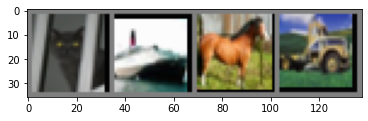

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
net = ResNet(BasicBlock, [2, 2, 2, 2]).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9,weight_decay=0.001) # Applying L2 regularization
print(device)
#scheduler= StepLR(optimizer,step_size=5,gamma=0.1) # Applying LR schedular

cuda


In [0]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data[0].to(device),data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 900 == 899:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 899))
            running_loss = 0.0

print('Finished Training')

[1,   900] loss: 1.594
[2,   900] loss: 0.974
[3,   900] loss: 0.737
[4,   900] loss: 0.615
[5,   900] loss: 0.553
[6,   900] loss: 0.482
[7,   900] loss: 0.440
[8,   900] loss: 0.404
[9,   900] loss: 0.366
[10,   900] loss: 0.341
[11,   900] loss: 0.318
[12,   900] loss: 0.297
[13,   900] loss: 0.279
[14,   900] loss: 0.260
[15,   900] loss: 0.239
[16,   900] loss: 0.227
[17,   900] loss: 0.220
[18,   900] loss: 0.205
[19,   900] loss: 0.203
[20,   900] loss: 0.181
Finished Training


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device),data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 88 %
